In [ ]:
import pyspark 
from pyspark.sql import Row
from pyspark.sql import SQLContext
from pyspark import SparkContext
from pyspark.sql.types import IntegerType
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')
from pyspark.sql.functions import *
sc=SparkContext('local[16]')


In [2]:
path='/data/dataprocessing/interproscan/all_bacilli.tsv'
#path='/homes/dthomas/Dilton_Hanze/Programming3/Assignment5/part.tsv'
df = SQLContext(sc).read.csv(path, sep=r'\t', header=None)#.select('col1','col2')

In [3]:
df=df.withColumnRenamed("_c0","Protein")\
   .withColumnRenamed("_c1","Sequence_MD5_digest")\
    .withColumnRenamed("_c2","Sequence_length")\
    .withColumnRenamed("_c3","Analysis")\
    .withColumnRenamed("_c4","Signature_accession")\
    .withColumnRenamed("_c5","Signature_description")\
    .withColumnRenamed("_c6","Start")\
    .withColumnRenamed("_c7","Stop")\
    .withColumnRenamed("_c8","Score")\
    .withColumnRenamed("_c9","Status")\
    .withColumnRenamed("_c10","Date")\
    .withColumnRenamed("_c11","Interpro_accession")\
    .withColumnRenamed("_c12","Interpro_description")\
    .withColumnRenamed("_c13","GO")\
    .withColumnRenamed("_c14","Pathway")
columns=df.columns   
df.limit(10).toPandas()

,Protein,Sequence_MD5_digest,Sequence_length,Analysis,Signature_accession,Signature_description,Start,Stop,Score,Status,Date,Interpro_accession,Interpro_description,GO,Pathway
0,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,TIGRFAM,TIGR03882,cyclo_dehyd_2: bacteriocin biosynthesis cyclod...,2,131,1.6E-21,T,25-04-2022,IPR022291,"Bacteriocin biosynthesis, cyclodehydratase domain",-,-
1,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,TIGRFAM,TIGR03604,TOMM_cyclo_SagD: thiazole/oxazole-forming pept...,161,547,0.0,T,25-04-2022,IPR027624,"Thiazole/oxazole-forming peptide maturase, Sag...",-,-
2,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,ProSiteProfiles,PS51664,YcaO domain profile.,159,547,75.396477,T,25-04-2022,IPR003776,YcaO-like domain,-,-
3,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,Gene3D,G3DSA:3.30.160.660,-,311,452,9.1E-46,T,25-04-2022,-,-,None,None
4,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,Gene3D,G3DSA:3.30.40.250,-,191,274,9.1E-46,T,25-04-2022,-,-,None,None
5,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,PANTHER,PTHR37809,RIBOSOMAL PROTEIN S12 METHYLTHIOTRANSFERASE AC...,95,547,0.0,T,25-04-2022,-,-,None,None
6,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,TIGRFAM,TIGR00702,TIGR00702: YcaO-type kinase domain,161,501,2.2E-22,T,25-04-2022,IPR003776,YcaO-like domain,-,-
7,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,Gene3D,G3DSA:3.30.1330.230,-,168,502,9.1E-46,T,25-04-2022,-,-,None,None
8,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,Pfam,PF02624,"YcaO cyclodehydratase, ATP-ad Mg2+-binding",161,501,8.6E-76,T,25-04-2022,IPR003776,YcaO-like domain,-,-
9,gi|29894058|gb|AAP07350.1|,b993c5cdda01fc20b0509cc528db817c,233,PANTHER,PTHR48111:SF2,TWO-COMPONENT RESPONSE REGULATOR,1,231,7.9E-108,T,25-04-2022,-,-,None,None


In [4]:
df=df.filter((df['Interpro_accession']!='-'))
df.limit(10).toPandas()

,Protein,Sequence_MD5_digest,Sequence_length,Analysis,Signature_accession,Signature_description,Start,Stop,Score,Status,Date,Interpro_accession,Interpro_description,GO,Pathway
0,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,TIGRFAM,TIGR03882,cyclo_dehyd_2: bacteriocin biosynthesis cyclod...,2,131,1.6E-21,T,25-04-2022,IPR022291,"Bacteriocin biosynthesis, cyclodehydratase domain",-,-
1,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,TIGRFAM,TIGR03604,TOMM_cyclo_SagD: thiazole/oxazole-forming pept...,161,547,0.0,T,25-04-2022,IPR027624,"Thiazole/oxazole-forming peptide maturase, Sag...",-,-
2,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,ProSiteProfiles,PS51664,YcaO domain profile.,159,547,75.396477,T,25-04-2022,IPR003776,YcaO-like domain,-,-
3,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,TIGRFAM,TIGR00702,TIGR00702: YcaO-type kinase domain,161,501,2.2E-22,T,25-04-2022,IPR003776,YcaO-like domain,-,-
4,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,Pfam,PF02624,"YcaO cyclodehydratase, ATP-ad Mg2+-binding",161,501,8.6E-76,T,25-04-2022,IPR003776,YcaO-like domain,-,-
5,gi|29894058|gb|AAP07350.1|,b993c5cdda01fc20b0509cc528db817c,233,PANTHER,PTHR48111,REGULATOR OF RPOS,1,231,7.9E-108,T,25-04-2022,IPR039420,Transcriptional regulatory protein WalR-like,-,-
6,gi|29894058|gb|AAP07350.1|,b993c5cdda01fc20b0509cc528db817c,233,ProSiteProfiles,PS51755,OmpR/PhoB-type DNA-binding domain profile.,132,231,46.094009,T,25-04-2022,IPR001867,OmpR/PhoB-type DNA-binding domain,GO:0000160|GO:0003677|GO:0006355,-
7,gi|29894058|gb|AAP07350.1|,b993c5cdda01fc20b0509cc528db817c,233,SMART,SM00862,Trans_reg_C_3,153,229,2.7E-29,T,25-04-2022,IPR001867,OmpR/PhoB-type DNA-binding domain,GO:0000160|GO:0003677|GO:0006355,-
8,gi|29894058|gb|AAP07350.1|,b993c5cdda01fc20b0509cc528db817c,233,Pfam,PF00486,"Transcriptional regulatory protein, C terminal",153,229,4.3E-30,T,25-04-2022,IPR001867,OmpR/PhoB-type DNA-binding domain,GO:0000160|GO:0003677|GO:0006355,-
9,gi|29894058|gb|AAP07350.1|,b993c5cdda01fc20b0509cc528db817c,233,CDD,cd00383,trans_reg_C,142,229,8.80739E-38,T,25-04-2022,IPR001867,OmpR/PhoB-type DNA-binding domain,GO:0000160|GO:0003677|GO:0006355,-


In [5]:
to_drop=[ 'Sequence_MD5_digest', 'Analysis',
       'Signature_accession', 'Signature_description', 
       'Score', 'Status', 'Date', 'Interpro_description',
       'GO', 'Pathway']
df=df.drop(*to_drop)
df.limit(10).toPandas()

,Protein,Sequence_length,Start,Stop,Interpro_accession
0,gi|29898682|gb|AAP11954.1|,547,2,131,IPR022291
1,gi|29898682|gb|AAP11954.1|,547,161,547,IPR027624
2,gi|29898682|gb|AAP11954.1|,547,159,547,IPR003776
3,gi|29898682|gb|AAP11954.1|,547,161,501,IPR003776
4,gi|29898682|gb|AAP11954.1|,547,161,501,IPR003776
5,gi|29894058|gb|AAP07350.1|,233,1,231,IPR039420
6,gi|29894058|gb|AAP07350.1|,233,132,231,IPR001867
7,gi|29894058|gb|AAP07350.1|,233,153,229,IPR001867
8,gi|29894058|gb|AAP07350.1|,233,153,229,IPR001867
9,gi|29894058|gb|AAP07350.1|,233,142,229,IPR001867


In [7]:
def fun1(x):
    if x>.90:
        return 1
    else:
        return 0
func_udf = udf(fun1,)

In [8]:
df=df.withColumn("feat_len", ((df['Stop']-df['Start'])))
df=df.withColumn("ratio", ((df['Stop']-df['Start'])/df['Sequence_length']))
df=df.withColumn("size", func_udf(df['ratio']))

df.limit(10).toPandas()

,Protein,Sequence_length,Start,Stop,Interpro_accession,feat_len,ratio,size
0,gi|29898682|gb|AAP11954.1|,547,2,131,IPR022291,129.0,0.235832,0
1,gi|29898682|gb|AAP11954.1|,547,161,547,IPR027624,386.0,0.705667,0
2,gi|29898682|gb|AAP11954.1|,547,159,547,IPR003776,388.0,0.709324,0
3,gi|29898682|gb|AAP11954.1|,547,161,501,IPR003776,340.0,0.621572,0
4,gi|29898682|gb|AAP11954.1|,547,161,501,IPR003776,340.0,0.621572,0
5,gi|29894058|gb|AAP07350.1|,233,1,231,IPR039420,230.0,0.987124,1
6,gi|29894058|gb|AAP07350.1|,233,132,231,IPR001867,99.0,0.424893,0
7,gi|29894058|gb|AAP07350.1|,233,153,229,IPR001867,76.0,0.326180,0
8,gi|29894058|gb|AAP07350.1|,233,153,229,IPR001867,76.0,0.326180,0
9,gi|29894058|gb|AAP07350.1|,233,142,229,IPR001867,87.0,0.373391,0


In [11]:
large_df=df.filter((df['ratio'])>.9)
large_df.limit(10).toPandas()

,Protein,Sequence_length,Start,Stop,Interpro_accession,feat_len,ratio,size
0,gi|29894058|gb|AAP07350.1|,233,1,231,IPR039420,230.0,0.987124,1
1,gi|29897770|gb|AAP11045.1|,399,18,391,IPR004636,373.0,0.934837,1
2,gi|29897770|gb|AAP11045.1|,399,27,391,IPR005814,364.0,0.912281,1
3,gi|29897770|gb|AAP11045.1|,399,14,391,IPR015424,377.0,0.944862,1
4,gi|29897770|gb|AAP11045.1|,399,17,391,IPR005814,374.0,0.937343,1
5,gi|29897770|gb|AAP11045.1|,399,17,394,IPR004636,377.0,0.944862,1
6,gi|29893947|gb|AAP07239.1|,120,1,120,IPR000456,119.0,0.991667,1
7,gi|29893947|gb|AAP07239.1|,120,3,120,IPR000456,117.0,0.975000,1
8,gi|29893947|gb|AAP07239.1|,120,2,120,IPR036373,118.0,0.983333,1
9,gi|29893947|gb|AAP07239.1|,120,3,120,IPR000456,117.0,0.975000,1


In [13]:
small_df=df.filter((df['ratio'])<.9)
small_df.limit(10).toPandas()

,Protein,Sequence_length,Start,Stop,Interpro_accession,feat_len,ratio,size
0,gi|29898682|gb|AAP11954.1|,547,2,131,IPR022291,129.0,0.235832,0
1,gi|29898682|gb|AAP11954.1|,547,161,547,IPR027624,386.0,0.705667,0
2,gi|29898682|gb|AAP11954.1|,547,159,547,IPR003776,388.0,0.709324,0
3,gi|29898682|gb|AAP11954.1|,547,161,501,IPR003776,340.0,0.621572,0
4,gi|29898682|gb|AAP11954.1|,547,161,501,IPR003776,340.0,0.621572,0
5,gi|29894058|gb|AAP07350.1|,233,132,231,IPR001867,99.0,0.424893,0
6,gi|29894058|gb|AAP07350.1|,233,153,229,IPR001867,76.0,0.326180,0
7,gi|29894058|gb|AAP07350.1|,233,153,229,IPR001867,76.0,0.326180,0
8,gi|29894058|gb|AAP07350.1|,233,142,229,IPR001867,87.0,0.373391,0
9,gi|29894058|gb|AAP07350.1|,233,4,114,IPR001789,110.0,0.472103,0


(array([5.02288e+05, 3.88200e+05, 2.45726e+05, 1.45099e+05, 6.55680e+04,
        3.48200e+04, 2.00840e+04, 5.06800e+03, 2.99700e+03, 1.78500e+03,
        1.12100e+03, 9.40000e+01, 1.81000e+02, 1.52000e+02, 1.01000e+02,
        8.80000e+01, 2.00000e+00, 1.00000e+00, 7.60000e+01, 4.90000e+01]),
 array([   5. ,   69.9,  134.8,  199.7,  264.6,  329.5,  394.4,  459.3,
         524.2,  589.1,  654. ,  718.9,  783.8,  848.7,  913.6,  978.5,
        1043.4, 1108.3, 1173.2, 1238.1, 1303. ]),
 <BarContainer object of 20 artists>)

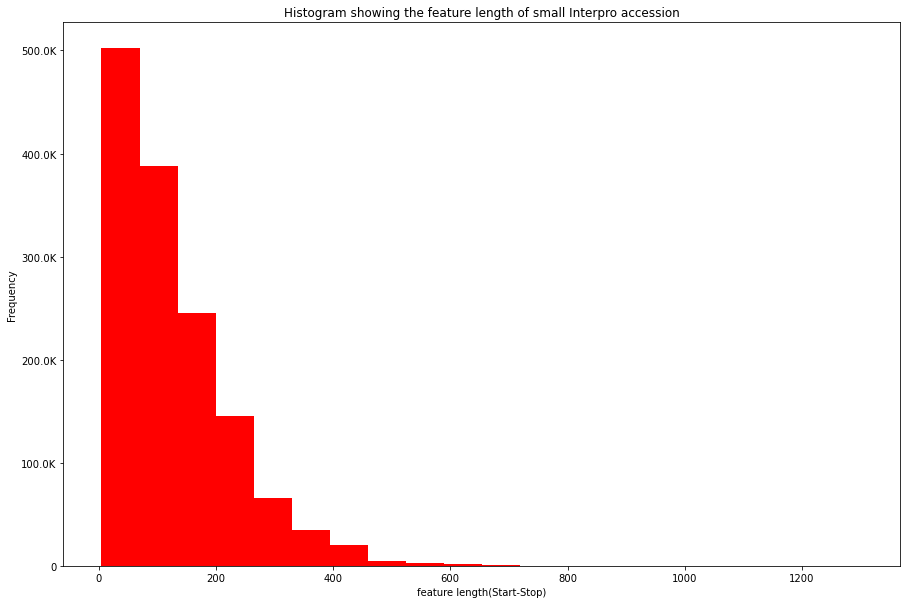

In [22]:
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
plt.title('Histogram showing the feature length of small Interpro accession')
plt.xlabel('feature length(Start-Stop)')
plt.ylabel('Frequency')
hist( ax,small_df.select('feat_len'),bins=20, color=['red'])
#axs[0,1].hist(axs[0,1], large_df.select('feat_len'),bins=20, color=['red'])

head -n 100000 all_bacilli.tsv >> /students/2021-2022/master/Dilton_DSLS/part.tsv